# 01 prepare environment for colab

## a) mount google drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## b) install mmsegmentation stuff

In [3]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15963, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 15963 (delta 121), reused 203 (delta 64), pack-reused 15633
Receiving objects: 100% (15963/15963), 23.04 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (11139/11139), done.
/content/mmsegmentation/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Obtaining file:///content/mmsegmentation/mmsegmentation
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.1.1
    Uninstalling mmsegmentation-1.1.1:
      Successfully uninstalled mmsegmentation-1.1.1
  Running setup.py develop for mmsegmentation


# 02 train model with mmsegmentation
## a) load config file

In [ ]:
from mmengine import Config

#cfg = Config.fromfile('/content/unet.py')
cfg = Config.fromfile('/content/segformer.py')

## b) create runner

In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

09/06 16:15:31 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 1499033734
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_5

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


09/06 16:15:32 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
09/06 16:15:32 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
/content/mmsegmentation/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## c) start training

In [ ]:
runner.train()

/content/mmsegmentation/mmsegmentation/mmseg/datasets/transforms/loading.py:83: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:lr=6e-05
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:weight_decay=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:decay_mult=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:lr=6e-05
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:weight_decay=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:decay_mult=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:lr=6e-05
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:weight_decay=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:decay_mult=0.0
09/06 16:15:35 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): MixVisionTransformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PatchEmbed(
          (projection): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (norm): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
        )
        (1): ModuleList(
          (0-1): 2 x TransformerEncoderLayer(
            (norm1): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
            (attn): EfficientMultiheadAttention(
              (attn): MultiheadAttention(
                (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
              )
              (proj_drop): Dropout(p=0.0, inplace=False)
              (dropout_layer): DropPath()
              (sr): Conv2d(32, 32, kernel_size=(8, 8), stride=(8, 8))
              (norm): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
            )
            (norm2): LayerNorm((32,), eps=1e-

## d) zip results for download

In [ ]:
!zip -r /content/file.zip /content/workdir

  adding: content/workdir/ (stored 0%)
  adding: content/workdir/iter_3000.pth (deflated 9%)
  adding: content/workdir/last_checkpoint (stored 0%)
  adding: content/workdir/iter_7000.pth (deflated 10%)
  adding: content/workdir/iter_6000.pth (deflated 9%)
  adding: content/workdir/out2.py (deflated 76%)
  adding: content/workdir/iter_4000.pth (deflated 9%)
  adding: content/workdir/20230906_161531/ (stored 0%)
  adding: content/workdir/20230906_161531/20230906_161531.log (deflated 87%)
  adding: content/workdir/20230906_161233/ (stored 0%)
  adding: content/workdir/20230906_161233/20230906_161233.log (deflated 91%)
  adding: content/workdir/20230906_160947/ (stored 0%)
  adding: content/workdir/20230906_160947/20230906_160947.log (deflated 91%)
  adding: content/workdir/20230906_160947/vis_data/ (stored 0%)
  adding: content/workdir/20230906_160947/vis_data/20230906_161531.json (deflated 77%)
  adding: content/workdir/20230906_160947/vis_data/20230906_161233.json (deflated 42%)
  addin

# 03 eval results
## a) eval 1 example

Loads checkpoint by local backend from path: /content/iter_8000.pth


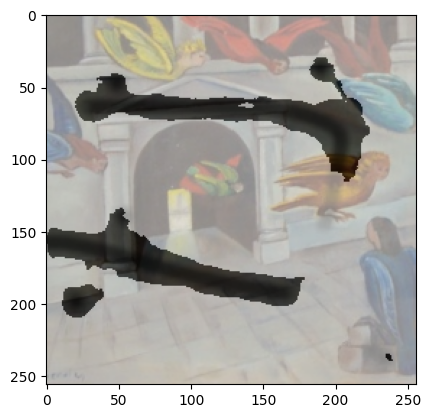

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import matplotlib.pyplot as plt

# Init the model from the config and the checkpoint
checkpoint_path = '/content/iter_8000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('/content/drive/MyDrive/TUD/defectsegmentation/dataset_small/img/test/Graverol_1949_O.png')
msk = mmcv.imread('/content/drive/MyDrive/TUD/defectsegmentation/dataset_small/msk/test/Graverol_1949_O.png')
result = inference_model(model, img)
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

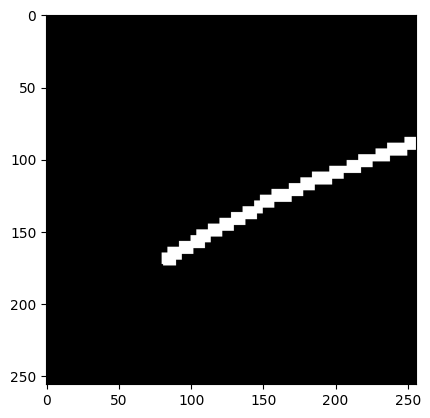

In [ ]:
plt.imshow(mmcv.bgr2rgb(msk*255))

## b) run test for metrics

In [ ]:
runner.test()

/content/mmsegmentation/mmsegmentation/mmseg/datasets/transforms/loading.py:83: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


09/06 16:51:48 - mmengine - INFO - Iter(test) [ 10/285]    eta: 0:02:00  time: 0.4372  data_time: 0.3983  memory: 312  
09/06 16:51:50 - mmengine - INFO - Iter(test) [ 20/285]    eta: 0:01:21  time: 0.1746  data_time: 0.1517  memory: 312  
09/06 16:51:52 - mmengine - INFO - Iter(test) [ 30/285]    eta: 0:01:05  time: 0.1547  data_time: 0.1321  memory: 312  
09/06 16:51:53 - mmengine - INFO - Iter(test) [ 40/285]    eta: 0:00:56  time: 0.1507  data_time: 0.1281  memory: 312  
09/06 16:51:54 - mmengine - INFO - Iter(test) [ 50/285]    eta: 0:00:49  time: 0.1453  data_time: 0.1223  memory: 312  
09/06 16:51:56 - mmengine - INFO - Iter(test) [ 60/285]    eta: 0:00:45  time: 0.1425  data_time: 0.1196  memory: 312  
09/06 16:51:58 - mmengine - INFO - Iter(test) [ 70/285]    eta: 0:00:42  time: 0.1826  data_time: 0.1581  memory: 312  
09/06 16:51:59 - mmengine - INFO - Iter(test) [ 80/285]    eta: 0:00:40  time: 0.1746  data_time: 0.1500  memory: 312  
09/06 16:52:01 - mmengine - INFO - Iter(

{'aAcc': 94.6, 'mIoU': 89.75, 'mAcc': 94.6}

## c) inference on test-dataset and result storage

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot
import glob
import os
from mmseg.apis import MMSegInferencer

config_path = '/content/out2.py'
checkpoint_path = '/content/iter_8000_segformer.pth'

imgpattern = '/content/drive/MyDrive/TUD/defectsegmentation/dataset_small/img/test/'

inferencer = MMSegInferencer(model=config_path, weights=checkpoint_path, device='cuda:0')

inferencer(imgpattern, out_dir='/content/work_dir2', img_out_dir='vis', pred_out_dir='pred', opacity=0.3)

Loads checkpoint by local backend from path: /content/iter_8000_segformer.pth


Output()

{'predictions': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.]

In [ ]:
!zip -r /content/res_segformer.zip /content/work_dir2

  adding: content/work_dir2/ (stored 0%)
  adding: content/work_dir2/pred/ (stored 0%)
  adding: content/work_dir2/pred/00000259_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000052_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000190_pred.png (deflated 0%)
  adding: content/work_dir2/pred/00000251_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000040_pred.png (deflated 0%)
  adding: content/work_dir2/pred/00000162_pred.png (deflated 21%)
  adding: content/work_dir2/pred/00000188_pred.png (deflated 8%)
  adding: content/work_dir2/pred/00000169_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000075_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000114_pred.png (deflated 11%)
  adding: content/work_dir2/pred/00000212_pred.png (stored 0%)
  adding: content/work_dir2/pred/00000096_pred.png (deflated 1%)
  adding: content/work_dir2/pred/00000069_pred.png (deflated 0%)
  adding: content/work_dir2/pred/00000200_pred.png (stored 0%)
  adding: conte